<center> <h1> <b>Song Birds<b></h1> </center>
<center> <h2>Model Automatization and Code Update</h2> </center>

# Import Libraries, Functions, and Classes

In [1]:
from song_class import * 
Pool() # crea pool to parallel programming on the optimization

<multiprocessing.pool.Pool state=RUN pool_size=8>

Looking for all wav files in path folder and audios path

In [2]:
#birdname      = 'Zonotrichia capensis'  # Nombre del ave
print("Total number of songs: {}".format(len(sound_files)))

Total number of songs: 91


# Choosing File, Silaba, and Chunck

In [14]:
num_file, no_syllable, no_chunck = 2, 3, 0
copeton = Song(sound_files[num_file])
copeton.p

name,value,initial value,min,max,vary
a0,0.11000000,0.11,0.00000000,0.25000000,False
a1,0.05000000,0.05,-2.00000000,2.00000000,False
b0,-0.10000000,-0.1,-1.00000000,0.50000000,False
b1,1.00000000,1,0.20000000,2.00000000,False
gamma,40000.0000,40000,0.10000000,100000.000,False
b2,0.00000000,0.0,-inf,inf,False
a2,0.00000000,0.0,-inf,inf,False


## Plot Song, Silaba, and Chunck

Number of syllables 6


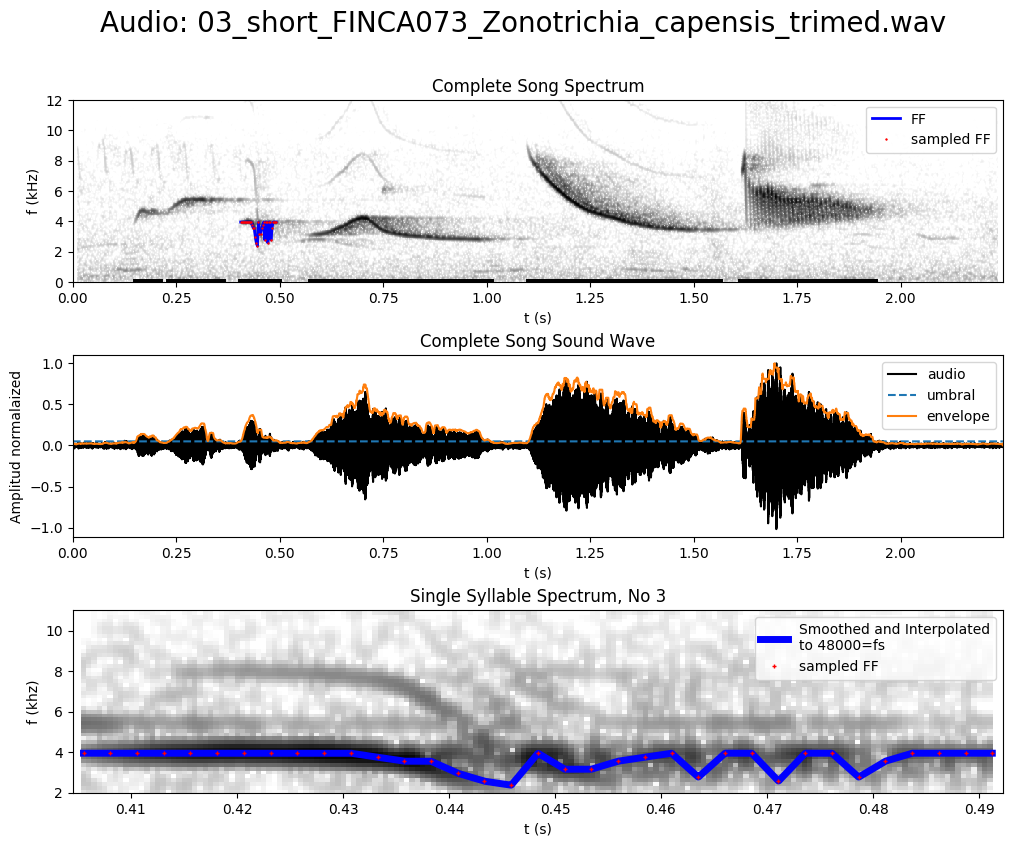

In [15]:
copeton.SyllableNo(no_syllable)         # 1) define
copeton.SolveSyllable(copeton.p)        # 2) solve
#copeton.OptimalVariable(kwargs)        # 3) optimize
copeton.Plot(sound_files[num_file], 0)  # 4) plot

## Model Initial Parameters

# Syllable i-th

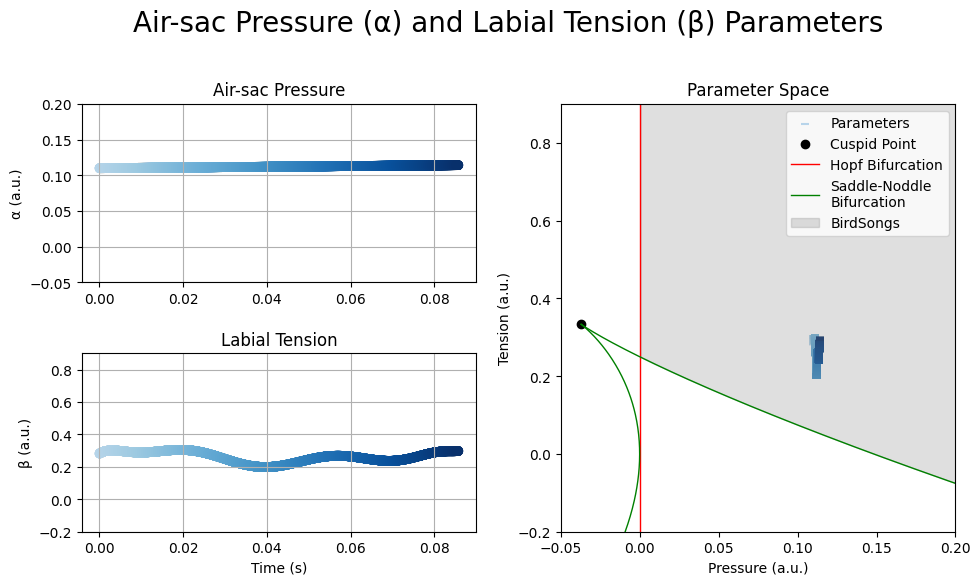

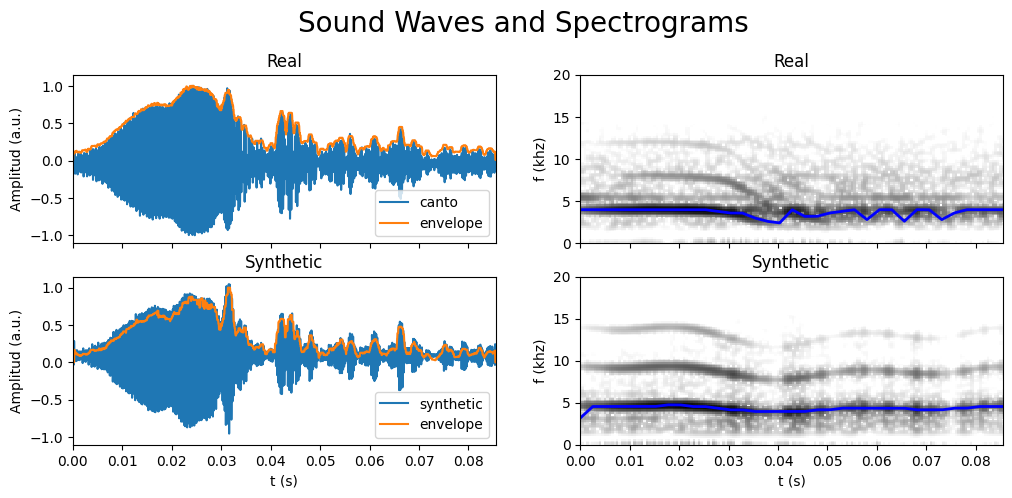

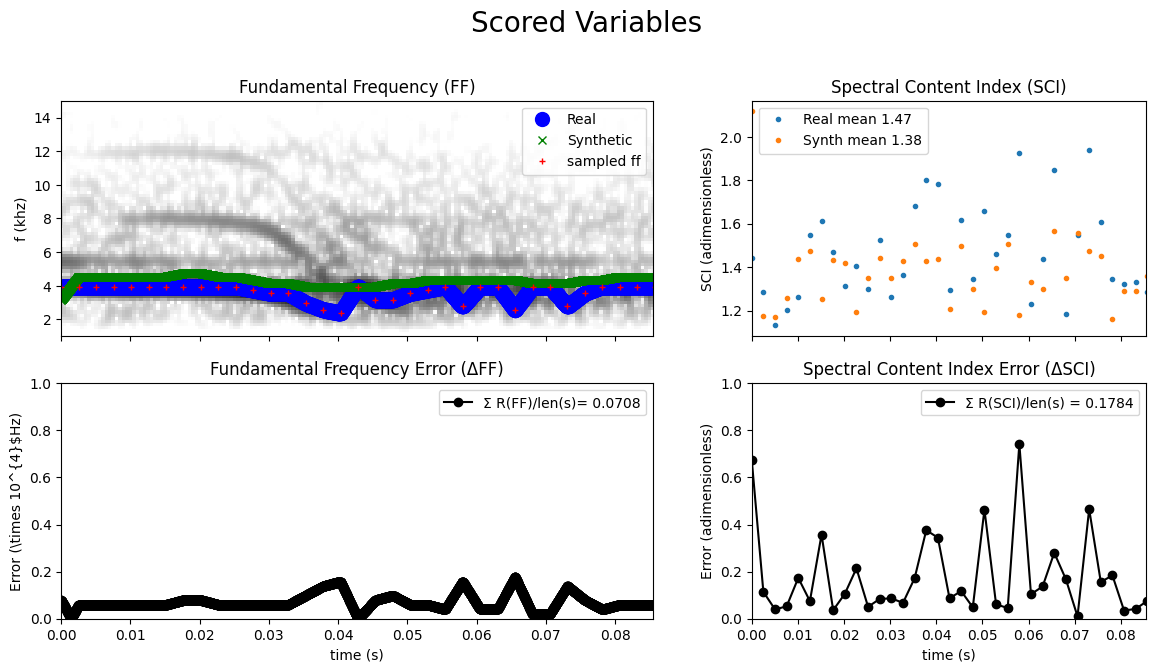

In [17]:
copeton.syllable.PlotAlphaBeta()
copeton.syllable.PlotSynth()
copeton.syllable.Plot(0)

# Chuck i-th 

In [ ]:
#copeton.Chunck(no_chunck)
#copeton.chunck.PlotAlphaBeta()
#copeton.chunck.PlotSynth()
#copeton.chunck.Plot(1)

# Optimization Problem γ 

Pool() # crea pool to parallel programming on the optimizationWe are interested to solve the following optimization problems

\begin{equation}
\begin{aligned}
\underset{ \gamma \in \mathbb{R}}{\text{min}} &\qquad || SCI_{real} - SCI_{synt} ( \gamma)||  \\
    \text { subject to }  & \qquad 0.1 <  \gamma \leq 100000
\end{aligned}
\end{equation}

and

\begin{equation}
\begin{aligned}
\underset{b \in \mathbb{R}^2}{\text{min}} &\qquad || FF_{real} - FF_{synt} (b)||  \\
    \text { subject to }  & \qquad -1 <  b_0 \leq 0.5, \\
                          &\;\; \qquad 0.2 <  b_1 \leq 2
\end{aligned}
\end{equation}

where

\begin{gather}
\alpha(t) = a_0 + a_1 t, \qquad  \beta(t)=b_0  + b_1\frac{FF_{real}}{10^4} 
\end{gather}

with $t\in [0,T]$ where $T$ is the duration of the sillable (chunck).

The coefficients $a_0$ and $a_1$ are calculated with the first harmonic 

\begin{equation}
\begin{aligned}
\underset{a \in \mathbb{R}^2}{\text{min}} &\qquad || \overline{H}_{real}^{st} - \overline{H}_{synt}^{st} (a)||  \\
    \text { subject to }  & \qquad \;\;Pool() 0 <  a_0 \leq 0.25, \\
                          & \qquad -2 <  a_1 \leq 2
\end{aligned}
\end{equation}

where $\overline{H}^{st}$ is used to represent the first harmonic amplitude.

In [ ]:
brute         = {'method':'brute', 'Ns':21, 'workers':-1} 
DualAnnealing = {'method':'dual_annealing','max_nfev':200, 'maxiter': 100}
copeton.syllable.p

Finding optimal $\gamma$, $b_0$, and $b_1$ by the brute method

In [ ]:
brute["Ns"] = 51
t = copeton.OptimalGamma(brute)
print("Times:  γ*: {0:.2f} min".format(t/60))

copeton.silaba.p

brute["Ns"] = 21
t1, t2 = copeton.OptimalBs(brute)
print("Times:\n   b_0: {0:.2f} min\n   b_1: {1:.2f} min".format(t1/60,t2/60))

copeton.syllable.p

## Plot Sillable with Optimal Parameters

In [ ]:
copeton.syllable.PlotAlphaBeta()
copeton.syllable.PlotSynth()
copeton.syllable.Plot(0)

# Next syllable

In [ ]:
next_syllable = no_syllable+1
copeton.SyllableNo(next_syllable)
copeton.SolveSyllable(copeton.p)

In [ ]:
copeton.syllable.p

In [ ]:
copeton.syllable.PlotAlphaBeta()
copeton.syllable.PlotSynth()
copeton.syllable.Plot(0)

In [ ]:
brute["Ns"] = 10
t1, t2 = copeton.OptimalBs(brute)
print("Times:\n   b_0: {0:.2f} min\n   b_1: {1:.2f} min".format(t1/60,t2/60))
copeton.syllable.p

In [ ]:
copeton.syllable.PlotAlphaBeta()
copeton.syllable.PlotSynth()
copeton.syllable.Plot(0)

In [ ]:
copeton.syllable.Audio(num_file,no_syllable)

# Proposal Functions

In [ ]:
# s, time = copeton.silaba.out_amp, copeton.silaba.time_out
# fs = copeton.silaba.fs
# s_i, t = Windows(s, time, fs)
# i = -2
# f_msf, f_aff, amp = SpectralContentSynth(s_i[i], fs) # method=method
# f_aff#s_i.shape

# maximos = peakutils.indexes(np.abs(np.fft.rfft(s_i[i])), thres=0.15, min_dist=5)

# plt.plot(np.fft.rfftfreq(s_i[i].shape[0], 1/fs),  np.abs(np.fft.rfft(s_i[i])))
# #plt.plot(s_i[i])
# #plt.plot(s)

In [ ]:
#y    = np.abs(np.fft.rfft(copeton.silaba.out_amp)) #[5:-5]
#freq = np.fft.rfftfreq(copeton.silaba.out_amp.size, d=1/copeton.fs)#[5:-5]

#freq, y = freq[5:-5], y # remove inital and final peaks
#peaks, _ = find_peaks(y, distance=10, height=np.max(y)/10)
#peaks = peakutils.indexes(y, thres=0.5, min_dist=30)

#plt.plot(freq,y); #plt.xlim((1, 2e4))
#plt.plot(freq[peaks[0]], y[peaks[0]], "x")

## Video
- Create a function to make video

```` 
import os
os.system("ffmpeg -f image2 -r 1/5 -i ./images/swissGenevaLake%01d.jpg -vcodec mpeg4 -y ./videos/swissGenevaLake.mp4")
````

- Add audio to the video

````
ffmpeg -i yourvideo.avi -i sound.mp3 -c copy -map 0:v:0 -map 1:a:0 output.avi
````

## Improve Pitch Extractor, extract harmonics

## Improve Normalizer and Envelope

## Make itartion for all sillables